In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

# Zadanie 1

Liczba brakujących danych: 866


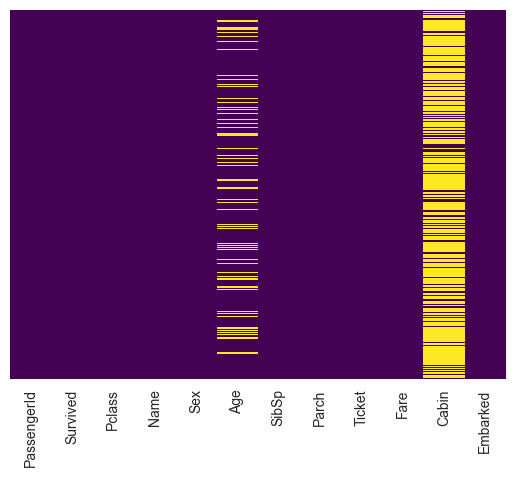

In [41]:
data = pd.read_csv("datasets/DSP_6.csv")

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

print(f"Liczba brakujących danych: {data.isnull().sum().sum()}")

# Zadanie 2

In [42]:
data.drop(columns=["Cabin"], inplace=True)
data.fillna(data.mean(numeric_only=True), inplace=True)
data.dropna(inplace=True)

<Axes: xlabel='Family', ylabel='count'>

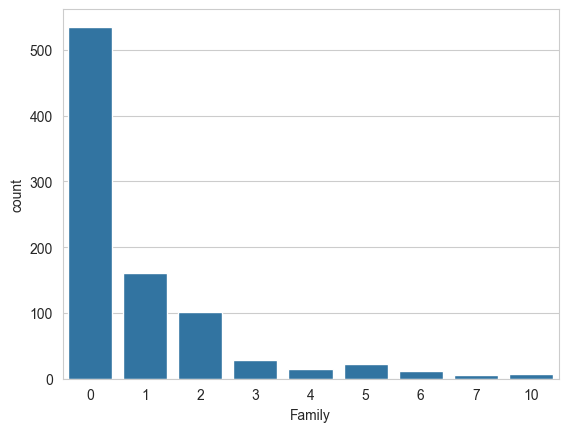

In [11]:
sns.set_style("whitegrid")
data["Family"] = data["SibSp"] + data["Parch"]
sns.countplot(x="Family", data=data)

<Axes: xlabel='Pclass', ylabel='Fare'>

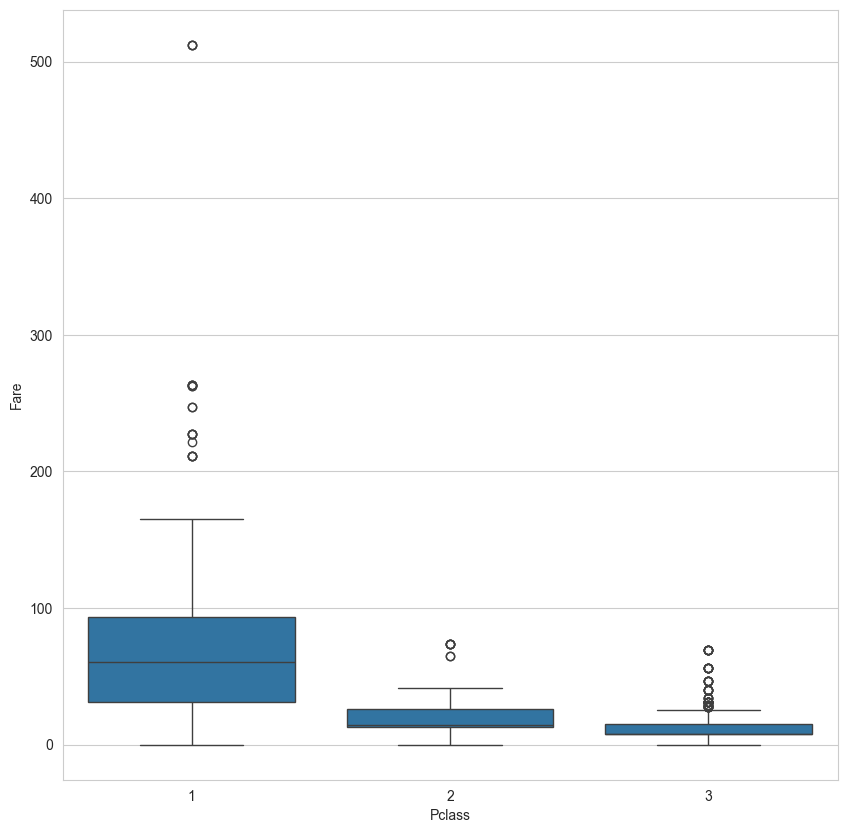

In [25]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="Pclass", y="Fare", data=data)

# Zadanie 3

In [27]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [30]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

ValueError: could not convert string to float: 'Flynn, Mr. John'

# ValueError: could not convert string to float: 'Flynn, Mr. John'

In [43]:
sex = pd.get_dummies(data["Sex"], drop_first=True)
embark = pd.get_dummies(data["Embarked"], drop_first=True)
data = pd.concat([data, sex, embark], axis=1)

In [44]:
data.drop(["Sex", "Embarked", "Ticket", "PassengerId", "Name"], axis=1, inplace=True)

In [37]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,True,False,True
1,1,1,38.0,1,0,71.2833,C85,False,False,False
2,1,3,26.0,0,0,7.9250,NaN,False,False,True
3,1,1,35.0,1,0,53.1000,C123,False,False,True
4,0,3,35.0,0,0,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,True,False,True
887,1,1,19.0,0,0,30.0000,B42,False,False,True
888,0,3,NaN,1,2,23.4500,NaN,False,False,True
889,1,1,26.0,0,0,30.0000,C148,True,False,False


In [45]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [47]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.83      0.75      0.79        32

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



In [49]:
confusion_matrix(y_test, predictions)

array([[52,  5],
       [ 8, 24]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=105)

In [51]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       116
           1       0.70      0.65      0.67        62

    accuracy                           0.78       178
   macro avg       0.76      0.75      0.75       178
weighted avg       0.78      0.78      0.78       178



In [53]:
confusion_matrix(y_test, predictions)

array([[99, 17],
       [22, 40]])

# Zadanie 4

In [57]:
data2 = pd.read_csv("datasets/DSP_2.csv")
data2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [58]:
data2.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [59]:
sex = pd.get_dummies(data2["Sex"], drop_first=True)
chest_pain_type = pd.get_dummies(data2["ChestPainType"], drop_first=True)
resting_ecg = pd.get_dummies(data2["RestingECG"], drop_first=True)
exercise_angina = pd.get_dummies(data2["ExerciseAngina"], drop_first=True)
st_slope = pd.get_dummies(data2["ST_Slope"], drop_first=True)
data2 = pd.concat([data2, sex, chest_pain_type, resting_ecg, exercise_angina, st_slope], axis=1)

In [61]:
data2.drop(["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], axis=1, inplace=True)

In [62]:
data2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [63]:
X = data2.drop("HeartDisease", axis=1)
y = data2["HeartDisease"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [65]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        51

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



In [67]:
confusion_matrix(y_test, predictions)

array([[35,  6],
       [ 7, 44]])